<a href="https://colab.research.google.com/github/balaji-2k1/mnist_digit_classification/blob/main/ANN_MNIST_me.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [ ]:
for i in x_train[0]:
  for j in i:
    print(j,end="   ")
  print("\n")

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

0   0   0   0   0   0   0   0   0   0   0   0   3   18   18   18   126   136   175   26   166   255   247   127   0   0   0   0   

0   0   0   0   0   0   0   0   30   36   94   154   170   253   253   253   253   253   225   172   253   242   195   64   0   0   0   0   

0   0   0   0   0   0   0   49   238   253   253   253   253   253   253   253   253   251   93   82   82   56   39   0   0   0   0   0   

0   0   0   0   

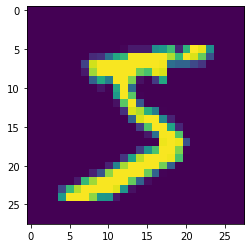

In [ ]:
plt.imshow(x_train[0])

In [ ]:
print(type(x_train))

<class 'numpy.ndarray'>


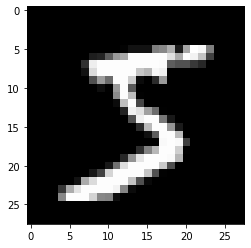

In [ ]:
plt.imshow(x_train[0],cmap='gray')

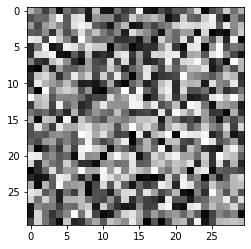

In [ ]:
# Sample creation of 2d pixel image for fun
import random 
arr=[]
rows,cols=30,30
for i in range(rows):
  temp=[]
  for j in range(cols):
    temp.append(random.randint(0,255))
  arr.append(temp)
plt.imshow(arr,cmap="gray")

In [ ]:
x=[]
for i in range(3):
  y=[]
  for j in range(3):
    z=[]
    for k in range(3):
      z.append(k)
    y.append(z)
  x.append(y)
x=np.array(x)
print(x.shape)
x=x.reshape(-1,9)
print(x.shape)

(3, 3, 3)
(3, 9)


In [ ]:
# print(int(x_train[0][0].shape[0]))
# x_train=x_train.reshape(-1,int(x_train[0][0].shape[0])*int(x_train[0][1].shape[0]))#not efficient to do it
x_train=x_train.reshape(-1,784)
x_test=x_test.reshape(-1,784)

In [ ]:
print(x_train[0].shape)

(784,)


In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [ ]:
y_train[0:9]

array([5, 0, 4, 1, 9, 2, 1, 3, 1], dtype=uint8)

In [ ]:
#Our machine does not understand numbers as distinguisngly 
#But it can understand them as a class 
from tensorflow.keras.utils import to_categorical
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)

In [ ]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [ ]:
print(y_train[0])#5
print(y_train[4])#9

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [ ]:
from keras.models import Sequential  #Models->Layers->modules 
from keras.layers import Dense       #Keras is a wrapper to tenorflow as a book
input_size=784
output_size=10
ann_model=Sequential()
ann_model.add(Dense(units=64,activation='sigmoid',input_shape=(input_size,)))
ann_model.add(Dense(units=output_size,activation='softmax'))

In [ ]:
ann_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


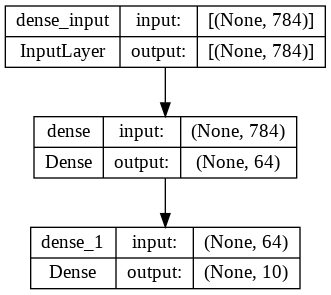

In [ ]:
keras.utils.plot_model(ann_model,show_shapes=True)

In [ ]:
ann_model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['categorical_accuracy'],
                  steps_per_execution=10)
#Here we are configuring/assigning parameters of the model for training

In [ ]:
#below block code is throwing some error due to mismatch so need to run this code
tf.config.experimental_run_functions_eagerly(True)

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
#epoch ,batch size , and validation datasets can be any suitable number given by us
callback=tf.keras.callbacks.EarlyStopping(monitor='loss',patience=1)
# This callback will stop the training when there is no improvement in
# the loss for three consecutive epochs.
model_results=ann_model.fit(x_train,y_train,
              epochs=20,
              batch_size=54,
              validation_split=0.1,callbacks=[callback],verbose=1)
#Here the loss increased after 3 epoch so how to counter this whilee training the model 
#how to counter whether those incidents does not occur
#Thus we use technique called early stopping


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/20
1000/1000 [==============================] - 16s 16ms/step - loss: 0.6946 - categorical_accuracy: 0.8168 - val_loss: 0.3701 - val_categorical_accuracy: 0.9047
Epoch 2/20
1000/1000 [==============================] - 16s 16ms/step - loss: 0.3965 - categorical_accuracy: 0.8877 - val_loss: 0.3155 - val_categorical_accuracy: 0.9192
Epoch 3/20
1000/1000 [==============================] - 16s 16ms/step - loss: 0.3654 - categorical_accuracy: 0.8955 - val_loss: 0.2917 - val_categorical_accuracy: 0.9123
Epoch 4/20
1000/1000 [==============================] - 17s 17ms/step - loss: 0.3474 - categorical_accuracy: 0.8971 - val_loss: 0.2748 - val_categorical_accuracy: 0.9185
Epoch 5/20
1000/1000 [==============================] - 16s 16ms/step - loss: 0.3334 - categorical_accuracy: 0.9014 - val_loss: 0.2849 - val_categorical_accuracy: 0.9177
Epoch 6/20
1000/1000 [==============================] - 16s 16ms/step - loss: 0.3207 - categorical_accuracy: 0.9051 - val_loss: 0.2442 - val_categoric

In [ ]:
model_results

In [ ]:
model_results.history

{'loss': [0.6946197748184204,
  0.39654961228370667,
  0.3653530180454254,
  0.3473787009716034,
  0.33343178033828735,
  0.32072150707244873,
  0.30333074927330017,
  0.28709518909454346,
  0.2973083555698395],
 'categorical_accuracy': [0.816777765750885,
  0.8877037167549133,
  0.8954814672470093,
  0.8971111178398132,
  0.9013518691062927,
  0.905055582523346,
  0.9097592830657959,
  0.9142777919769287,
  0.910111129283905],
 'val_loss': [0.37009188532829285,
  0.31549814343452454,
  0.29171478748321533,
  0.2748297154903412,
  0.28493598103523254,
  0.24417570233345032,
  0.24310393631458282,
  0.2597547769546509,
  0.24365997314453125],
 'val_categorical_accuracy': [0.9046666622161865,
  0.9191666841506958,
  0.9123333096504211,
  0.9185000061988831,
  0.9176666736602783,
  0.9275000095367432,
  0.9304999709129333,
  0.9198333621025085,
  0.9286666512489319]}

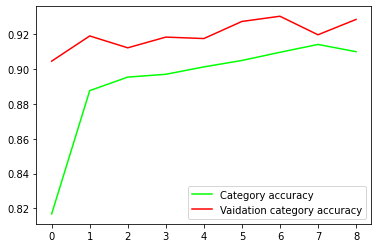

In [ ]:
plt.plot(model_results.history['categorical_accuracy'],color="#00ff00",label="Category accuracy")
plt.plot(model_results.history['val_categorical_accuracy'],color="#ff0000",label="Vaidation category accuracy")
plt.legend() #adds axis label
plt.show()

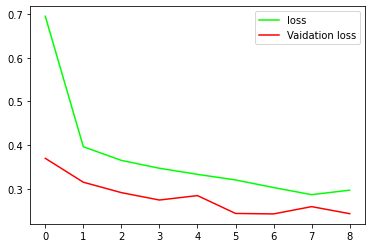

In [ ]:
plt.plot(model_results.history['loss'],color="#00ff00",label="loss")
plt.plot(model_results.history['val_loss'],color="#ff0000",label="Vaidation loss")
plt.legend() #adds axis label
plt.show()

In [ ]:
x_test.shape

(10000, 784)

In [ ]:
print(x_test[0].shape)

(784,)


In [ ]:
ypred=ann_model.predict(x_test)

313/313 [==============================] - 1s 3ms/step


In [ ]:
ypred.shape

(10000, 10)

In [ ]:
#each testing data has 10 category of which class it belongs thats why 10 columns

In [ ]:
print("ypred 0 ",ypred[0])
print("y_test 0 ",y_test[0])

ypred 0  [1.4419581e-05 1.7007545e-06 8.1255901e-05 3.2731704e-04 5.4835913e-05
 2.2544740e-05 3.7197933e-07 9.9807882e-01 2.4942285e-05 1.3937652e-03]
y_test 0  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [ ]:
ann_model.save('project/')

In [ ]:
our_model=keras.models.load_model('project/')

In [ ]:
score = our_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Test loss: 0.28500035405158997
Test accuracy: 0.919700026512146


1/1 [==============================] - 0s 22ms/step


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


The Image Digit Detected is  2


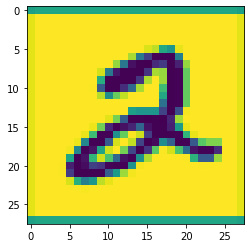

In [ ]:
#We Created a simple Neural Network Using Dense Layer,considering each pixel as features
#so if we are going to give a real world image to predict it cannot understand
#We need to convert image into array and pass to the current network
img = keras.preprocessing.image.load_img('/content/drive/MyDrive/Datasets/mnistimg.png',color_mode = "grayscale", target_size=(28,28))
plt.imshow(img)
img = keras.preprocessing.image.img_to_array(img)
img = img.reshape(1,784)
result = our_model.predict(img)
print("The Image Digit Detected is ",np.argmax(result))

Hurrey Created my First Neural Model